In [1]:
#import library
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
#Task1

#read the text file
with open('input_script.txt') as original:
    line = original.read()


In [3]:
class Format:
    def __init__(self,data):
        self.data = data
        
    def extract(self,pattern):
        cleaned = re.findall(pattern, self.data) #extract particular pattern
        return cleaned
    
    def substitute(self,pattern,repl):
        removed = re.sub(pattern,repl, self.data) #substitute particular pattern
        return removed
        
    def remove_symbol(self, target, replace):
        for i in range(len(self.data)):
            self.data[i] = self.data[i].replace(target, replace) #remove target symbol
        return self.data
        

In [4]:
#extract the dialogues
fline = Format(line)
fline = fline.extract('.*:.*')
fline ='\n'.join(fline)
#print(fline)

#remove the other meta data
remove_meta = Format(fline)
remove_meta = remove_meta.substitute('\(.*?\)|\[.*?\]|.*by:.*', '')
#print(remove_meta.strip())


In [5]:
#return a list of tuples
#extract character name and add them into a list
ext_char = Format(remove_meta.lower())
ext_char = ext_char.extract('.*:')

#remove ':' from extracted name
dirty_ext_char = Format(ext_char)
cleaned_ext_char = dirty_ext_char.remove_symbol(':', '')

    
#print(cleaned_ext_char)

In [6]:
#extract the corresponding dialogue
ext_dia = Format(remove_meta)
ext_dia = ext_dia.extract(':.*')

#remove ':' from extracted dialogue
dirty_ext_dia = Format(ext_dia)
cleaned_ext_dia = dirty_ext_dia.remove_symbol(': ', '')

#print(cleaned_ext_dia)

In [7]:
ls_dia = list(zip(cleaned_ext_char, cleaned_ext_dia))
#print(ls_dia)


In [8]:
with open('32353391_clean_dialogue.txt','w') as cd:
    cd.write(str(ls_dia))

In [ ]:
#Task2

In [9]:
class Character:
    def __init__(self, character):
        self.character = character
        self.dialogue = []
    
    def get_dialogue(self):
        for i in range(len(ls_dia)):
            if self.character in ls_dia[i][0]: #match the character name in the tuples
                self.dialogue.append(ls_dia[i][1].strip()) #add the dialogue of that character into a list
        return '\n'.join(self.dialogue)
    
    def export_file(self):
        fn = str('32353391_'+self.character+'.txt')
        with open(fn,'w') as f:
            f.write(str('\n'.join(self.dialogue)))
            
    def get_count(self):
        fname = '32353391_'+self.character+'.txt'
        with open(fname) as f:
            f2line = f.read()
            f2line = re.sub('[^\w\s]','', f2line) #remove all punctuation
            f2line = f2line.split() #measure for word count

        if int(len(set(f2line))) > 100: #only for character has sopken more than 100 words

            with open(fname) as f:
                fline = f.readlines()

            for i in range(len(fline)):
                fline[i] = re.sub('[^\w\s]','', fline[i]) #remove all punctuation
                fline[i] = fline[i].strip().lower()
                fline[i] = fline[i].split()
                fline[i] = list(set(fline[i])) #for each line of dialogue, remove duplicated words

            value_count = {}
            #use a dictionary to store the number that the word appeared
            for i in fline:
                for j in i:
                    if j in value_count.keys():
                        value_count[j] += 1 #count + 1 if the word match the key in dictionary
                    else:
                        value_count[j] = 1
                        
            # sort the dictionary based on the value
            value_count = sorted(value_count.items(), key=lambda x: x[1], reverse = True)

            max_word = list(value_count[0:5]) #get the top 5 number of word count
        else:
            max_word = [] #return empty list for characters who has spoken less than 100 words

        return max_word


    

In [10]:
#create a list of character
characters = list(set(cleaned_ext_char))
print(characters)

['monica', "joey's look-a-like", 'the instructor', 'the doctor', 'chandler', 'ross', 'carl', 'phoebe', 'joey', 'receptionist', 'janice', 'janice voice', 'phoebe and rachel', 'gunther', 'rachel']


In [11]:
#get the dialogue of each character and export to a file
for i in range(len(characters)):
    char_name = characters[i] #set the character name into a variavle
    char_name = Character(char_name) 
    char_name_f = char_name.get_dialogue() #for each character get the dialogue
    char_name.export_file()


In [ ]:
#Task3

In [12]:
#get the top 5 word count for each character by using the get_count method in character class
character_word = []
final_char = []
for i in range(len(characters)):
    char_name = characters[i].lower()
    char_word = Character(char_name)
    char_word = char_word.get_count() #get the top 5 word count for each character
    
    #insert the corresponding character name into each tuple
    for j in range(len(char_word)):
        a = list(char_word[j])
        a.insert(0,char_name)
        character_word.append(a)
        final_char.append(char_name) #get the character who has spoken more than 100 words


print(character_word)


[['monica', 'you', 14], ['monica', 'to', 10], ['monica', 'i', 10], ['monica', 'the', 9], ['monica', 'okay', 9], ['chandler', 'i', 20], ['chandler', 'you', 13], ['chandler', 'to', 12], ['chandler', 'the', 10], ['chandler', 'a', 9], ['ross', 'i', 15], ['ross', 'you', 15], ['ross', 'a', 11], ['ross', 'what', 10], ['ross', 'of', 8], ['phoebe', 'is', 5], ['phoebe', 'a', 4], ['phoebe', 'we', 4], ['phoebe', 'you', 4], ['phoebe', 'it', 3], ['joey', 'i', 11], ['joey', 'of', 10], ['joey', 'the', 8], ['joey', 'you', 8], ['joey', 'to', 7], ['rachel', 'a', 8], ['rachel', 'i', 7], ['rachel', 'that', 5], ['rachel', 'it', 3], ['rachel', 'of', 3]]


In [19]:
final_char = list(set(final_char)) #get the unique character name to use it later

In [20]:
#create 1 table for all data
final_table = pd.DataFrame(character_word,columns=['Name','Word','Frequency'])
print(final_table)

        Name  Word  Frequency
0     monica   you         14
1     monica    to         10
2     monica     i         10
3     monica   the          9
4     monica  okay          9
5   chandler     i         20
6   chandler   you         13
7   chandler    to         12
8   chandler   the         10
9   chandler     a          9
10      ross     i         15
11      ross   you         15
12      ross     a         11
13      ross  what         10
14      ross    of          8
15    phoebe    is          5
16    phoebe     a          4
17    phoebe    we          4
18    phoebe   you          4
19    phoebe    it          3
20      joey     i         11
21      joey    of         10
22      joey   the          8
23      joey   you          8
24      joey    to          7
25    rachel     a          8
26    rachel     i          7
27    rachel  that          5
28    rachel    it          3
29    rachel    of          3


In [15]:
final_table.to_csv('32353391_data.csv') #turn the dataframe into a csv file

In [ ]:
#Task4

In [16]:
print(final_char)

['monica', 'chandler', 'phoebe', 'joey', 'ross', 'rachel']


In [17]:
#group the data by character name and format to a pivot table for each character, then store them in a list
grouped = final_table.groupby(final_table.Name) #table group by name column

plot_ls = [] #get the list of plot
for i in range(len(final_char)):
    char_name = final_char[i].lower()
    char_table = grouped.get_group(char_name) #get a table for each character
    char_plot = char_table.pivot(index='Name', columns = 'Word', values = 'Frequency') #turn it into pivot table
    plot_ls.append(char_plot)




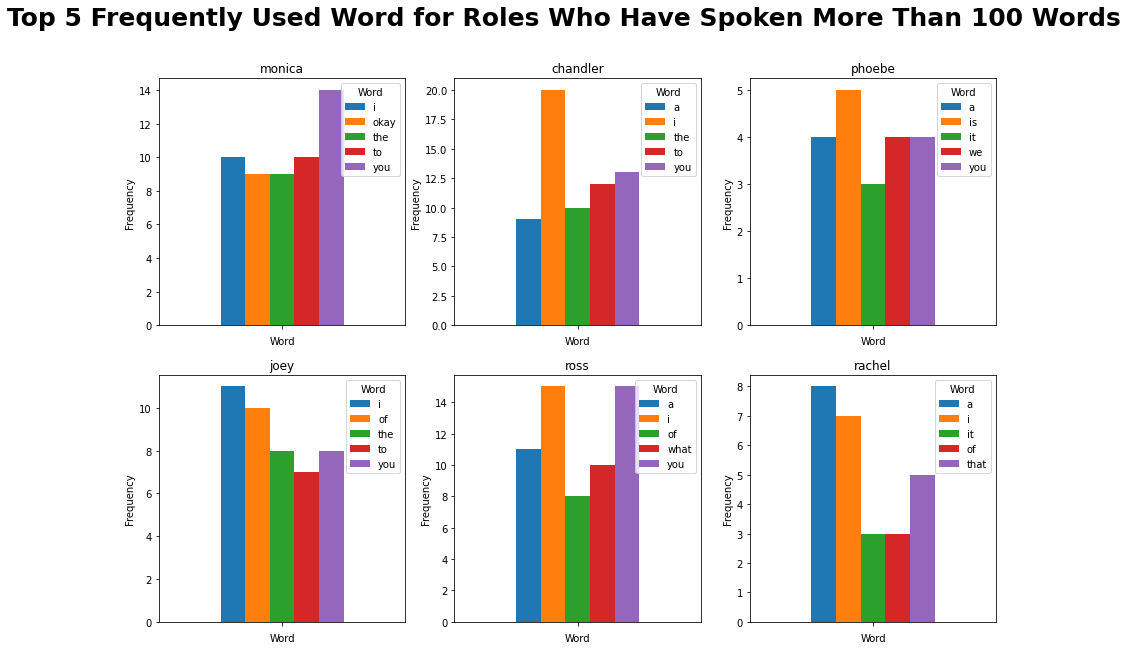

In [18]:
#construct the big picture of the plot
nrow=2
ncol=3
fig, axes = plt.subplots(nrow, ncol,figsize=(15,10)) #build the subplot with 2 row and 3 column

count=0 #for later iteration

#use for loop to plot each subplot
for r in range(nrow):
    for c in range(ncol):
        plot_ls[count].plot(kind='bar', ylabel = 'Frequency',
        ax=axes[r,c]).set_title(final_char[count]) #plot for each subplot
        ax1 = axes[r,c].set_xticklabels([])#remove bar label
        ax2 = axes[r,c].set_xlabel('Word')#add x axis lable
        count+=1
        
plt.suptitle("Top 5 Frequently Used Word for Roles Who Have Spoken More Than 100 Words",fontweight ="bold",fontsize = 25)#super title of the plot
plt.show() #print the plot

Justify the choice of the graph:

-by using bar chart, it clearly shows the number of word appear in each character. Also, the length of bar could provide clear comparison with other words. The amount is compared within each character. Since each character has spoken different amount of words, there is no means to compare with each other. Therefore, the scale of y-axis maybe different for each character. 

-the legend clearly shows the lable of each bar which represents the particular word. Different colors of each bar also help us to differeniate them easily.

-each subplot is grouped by characters and subtitle clearly labelled the character. It will be easier for us to analyse the data.

-putting all the subplot in a graph will be easier for us to have a big picture of the whole data.

Provide concise and precise observations:

-the most frequently used words include 'a' and 'i' in most of the character

-the word 'i', it is the top 2 frequently used word among all the character

-most frequently used words are mainly pronoun, such as 'you', 'i' and article, such as 'a', 'the'.

-the most frequently use word in the script is 'i' from Chandler, which has appeared 20 times.